# Топик 3

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = (10, 8)

import collections

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [2]:
# Create dataframe with dummy variables
def create_df(dic, feature_list):
    out = pd.DataFrame(dic)
    out = pd.concat([out, pd.get_dummies(out[feature_list])], axis=1)
    out.drop(feature_list, axis=1, inplace=True)
    return out


# Some feature values are present in train and absent in test and vice-versa.
def intersect_features(train, test):
    common_feat = list(set(train.keys()) & set(test.keys()))
    return train[common_feat], test[common_feat]

In [3]:
features = ["Looks", "Alcoholic_beverage", "Eloquence", "Money_spent"]

In [4]:
df_train = {}
df_train["Looks"] = [
    "handsome",
    "handsome",
    "handsome",
    "repulsive",
    "repulsive",
    "repulsive",
    "handsome",
]
df_train["Alcoholic_beverage"] = ["yes", "yes", "no", "no", "yes", "yes", "yes"]
df_train["Eloquence"] = ["high", "low", "average", "average", "low", "high", "average"]
df_train["Money_spent"] = ["lots", "little", "lots", "little", "lots", "lots", "lots"]
df_train["Will_go"] = LabelEncoder().fit_transform(["+", "-", "+", "-", "-", "+", "+"])

df_train = create_df(df_train, features)
df_train

,Will_go,Looks_handsome,Looks_repulsive,Alcoholic_beverage_no,Alcoholic_beverage_yes,Eloquence_average,Eloquence_high,Eloquence_low,Money_spent_little,Money_spent_lots
0,0,1,0,0,1,0,1,0,0,1
1,1,1,0,0,1,0,0,1,1,0
2,0,1,0,1,0,1,0,0,0,1
3,1,0,1,1,0,1,0,0,1,0
4,1,0,1,0,1,0,0,1,0,1
5,0,0,1,0,1,0,1,0,0,1
6,0,1,0,0,1,1,0,0,0,1


In [5]:
df_train.dtypes

Will_go                   int64
Looks_handsome            uint8
Looks_repulsive           uint8
Alcoholic_beverage_no     uint8
Alcoholic_beverage_yes    uint8
Eloquence_average         uint8
Eloquence_high            uint8
Eloquence_low             uint8
Money_spent_little        uint8
Money_spent_lots          uint8
dtype: object

In [6]:
df_test = {}
df_test["Looks"] = ["handsome", "handsome", "repulsive"]
df_test["Alcoholic_beverage"] = ["no", "yes", "yes"]
df_test["Eloquence"] = ["average", "high", "average"]
df_test["Money_spent"] = ["lots", "little", "lots"]
df_test = create_df(df_test, features)
df_test

,Looks_handsome,Looks_repulsive,Alcoholic_beverage_no,Alcoholic_beverage_yes,Eloquence_average,Eloquence_high,Money_spent_little,Money_spent_lots
0,1,0,1,0,1,0,0,1
1,1,0,0,1,0,1,1,0
2,0,1,0,1,1,0,0,1


In [7]:
# Some feature values are present in train and absent in test and vice-versa.
y = df_train["Will_go"]
df_train, df_test = intersect_features(train=df_train, test=df_test)
df_train

,Eloquence_high,Alcoholic_beverage_yes,Eloquence_average,Looks_handsome,Money_spent_little,Money_spent_lots,Looks_repulsive,Alcoholic_beverage_no
0,1,1,0,1,0,1,0,0
1,0,1,0,1,1,0,0,0
2,0,0,1,1,0,1,0,1
3,0,0,1,0,1,0,1,1
4,0,1,0,0,0,1,1,0
5,1,1,0,0,0,1,1,0
6,0,1,1,1,0,1,0,0


In [8]:
dt = DecisionTreeClassifier(criterion="entropy", random_state=17)
dt.fit(df_train, y);

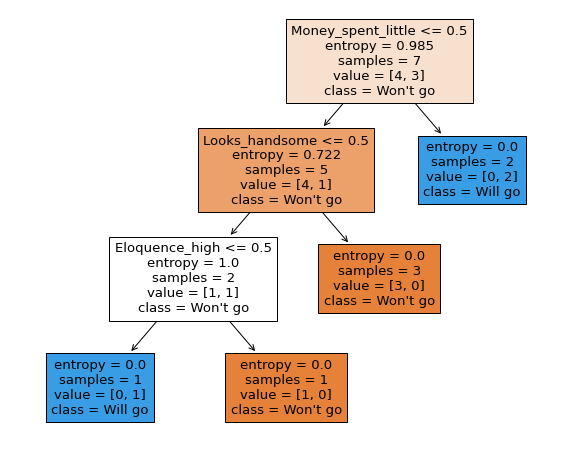

In [9]:
plot_tree(
    dt, feature_names=df_train.columns, filled=True, class_names=["Won't go", "Will go"]
);

### Функции для рассчета энтропии и прироста информации

In [11]:
balls = [1 for i in range(9)] + [0 for i in range(11)]
balls

[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [12]:
# two groups
balls_left = [1 for i in range(8)] + [0 for i in range(5)]  # 8 blue and 5 yellow
balls_right = [1 for i in range(1)] + [0 for i in range(6)]  # 1 blue and 6 yellow

In [13]:
from math import log

def entropy(a_list):
    lst = list(a_list)
    size = len(lst)
    entropy = 0
    set_elements = len(set(lst))
    if set_elements in [0, 1]:
        return 0
    for i in set(lst):
        occ = lst.count(i)
        entropy -= occ / size * log(occ / size, 2)
    return entropy

In [14]:
print(entropy(balls))  # 9 blue and 11 yellow ones
print(entropy(balls_left))  # 8 blue and 5 yellow ones
print(entropy(balls_right))  # 1 blue and 6 yellow ones
print(entropy([1, 2, 3, 4, 5, 6]))  # entropy of a fair 6-sided die

0.9927744539878084
0.961236604722876
0.5916727785823275
2.584962500721156


In [15]:
# information gain calculation
def information_gain(root, left, right):
    """ root - initial data, left and right - two partitions of initial data"""

    return (
        entropy(root)
        - 1.0 * len(left) / len(root) * entropy(left)
        - 1.0 * len(right) / len(root) * entropy(right)
    )

In [16]:
print(information_gain(balls, balls_left, balls_right))

0.16088518841412436


In [17]:
def information_gains(X, y):
    """Outputs information gain when splitting with each feature"""
    out = []
    for i in X.columns:
        out.append(information_gain(y, y[X[i] == 0], y[X[i] == 1]))
    return out

In [18]:
information_gains(df_train, y)

[0.2916919971380598,
 0.005977711423774124,
 0.02024420715375619,
 0.12808527889139454,
 0.46956521111470706,
 0.46956521111470706,
 0.12808527889139454,
 0.005977711423774124]

In [19]:
def btree(X, y, feature_names):
    clf = information_gains(X, y)
    best_feat_id = clf.index(max(clf))
    best_feature = feature_names[best_feat_id]
    print(f"Best feature to split: {best_feature}")

    x_left = X[X.iloc[:, best_feat_id] == 0]
    x_right = X[X.iloc[:, best_feat_id] == 1]
    print(f"Samples: {len(x_left)} (left) and {len(x_right)} (right)")

    y_left = y[X.iloc[:, best_feat_id] == 0]
    y_right = y[X.iloc[:, best_feat_id] == 1]
    entropy_left = entropy(y_left)
    entropy_right = entropy(y_right)
    print(f"Entropy: {entropy_left} (left) and {entropy_right} (right)")
    print("_" * 30 + "\n")
    if entropy_left != 0:
        print(f"Splitting the left group with {len(x_left)} samples:")
        btree(x_left, y_left, feature_names)
    if entropy_right != 0:
        print(f"Splitting the right group with {len(x_right)} samples:")
        btree(x_right, y_right, feature_names)

In [20]:
btree(df_train, y, df_train.columns)

Best feature to split: Money_spent_little
Samples: 5 (left) and 2 (right)
Entropy: 0.7219280948873623 (left) and 0 (right)
______________________________

Splitting the left group with 5 samples:
Best feature to split: Looks_handsome
Samples: 2 (left) and 3 (right)
Entropy: 1.0 (left) and 0 (right)
______________________________

Splitting the left group with 2 samples:
Best feature to split: Eloquence_high
Samples: 1 (left) and 1 (right)
Entropy: 0 (left) and 0 (right)
______________________________



In [21]:
DATA_PATH = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/"

In [22]:
data_train = pd.read_csv(DATA_PATH + "adult_train.csv", sep=";")
data_test = pd.read_csv(DATA_PATH + "adult_test.csv", sep=";")

In [23]:
data_train.head(5)

,Age,Workclass,fnlwgt,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [24]:
print(data_test.count)
data_test = data_test[
    (data_test["Target"] == " >50K.") | (data_test["Target"] == " <=50K.")
]

<bound method DataFrame.count of                         Age      Workclass    fnlwgt      Education  \
0      |1x3 Cross validator            NaN       NaN            NaN   
1                        25        Private  226802.0           11th   
2                        38        Private   89814.0        HS-grad   
3                        28      Local-gov  336951.0     Assoc-acdm   
4                        44        Private  160323.0   Some-college   
...                     ...            ...       ...            ...   
16277                    39        Private  215419.0      Bachelors   
16278                    64            NaN  321403.0        HS-grad   
16279                    38        Private  374983.0      Bachelors   
16280                    44        Private   83891.0      Bachelors   
16281                    35   Self-emp-inc  182148.0      Bachelors   

       Education_Num       Martial_Status          Occupation  \
0                NaN                  NaN        

In [25]:
data_test.count

<bound method DataFrame.count of       Age      Workclass    fnlwgt      Education  Education_Num  \
1      25        Private  226802.0           11th            7.0   
2      38        Private   89814.0        HS-grad            9.0   
3      28      Local-gov  336951.0     Assoc-acdm           12.0   
4      44        Private  160323.0   Some-college           10.0   
5      18            NaN  103497.0   Some-college           10.0   
...    ..            ...       ...            ...            ...   
16277  39        Private  215419.0      Bachelors           13.0   
16278  64            NaN  321403.0        HS-grad            9.0   
16279  38        Private  374983.0      Bachelors           13.0   
16280  44        Private   83891.0      Bachelors           13.0   
16281  35   Self-emp-inc  182148.0      Bachelors           13.0   

            Martial_Status          Occupation     Relationship  \
1            Never-married   Machine-op-inspct        Own-child   
2       Married-

In [26]:
# encode target variable as integer
data_train.loc[data_train["Target"] == " <=50K", "Target"] = 0
data_train.loc[data_train["Target"] == " >50K", "Target"] = 1

data_test.loc[data_test["Target"] == " <=50K.", "Target"] = 0
data_test.loc[data_test["Target"] == " >50K.", "Target"] = 1

In [27]:
data_test.head(5)

,Age,Workclass,fnlwgt,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,0
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,0
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,1
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,1
5,18,NaN,103497.0,Some-college,10.0,Never-married,NaN,Own-child,White,Female,0.0,0.0,30.0,United-States,0


In [28]:
data_test.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,16281,73,35,461,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Workclass,15318,8,Private,11210,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fnlwgt,16281,NaN,NaN,NaN,189436,105715,13492,116736,177831,238384,1.4904e+06
Education,16281,16,HS-grad,5283,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education_Num,16281,NaN,NaN,NaN,10.0729,2.56755,1,9,10,12,16
Martial_Status,16281,7,Married-civ-spouse,7403,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Occupation,15315,14,Prof-specialty,2032,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Relationship,16281,6,Husband,6523,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Race,16281,5,White,13946,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,16281,2,Male,10860,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
data_train["Target"].value_counts()

0    24720
1     7841
Name: Target, dtype: int64

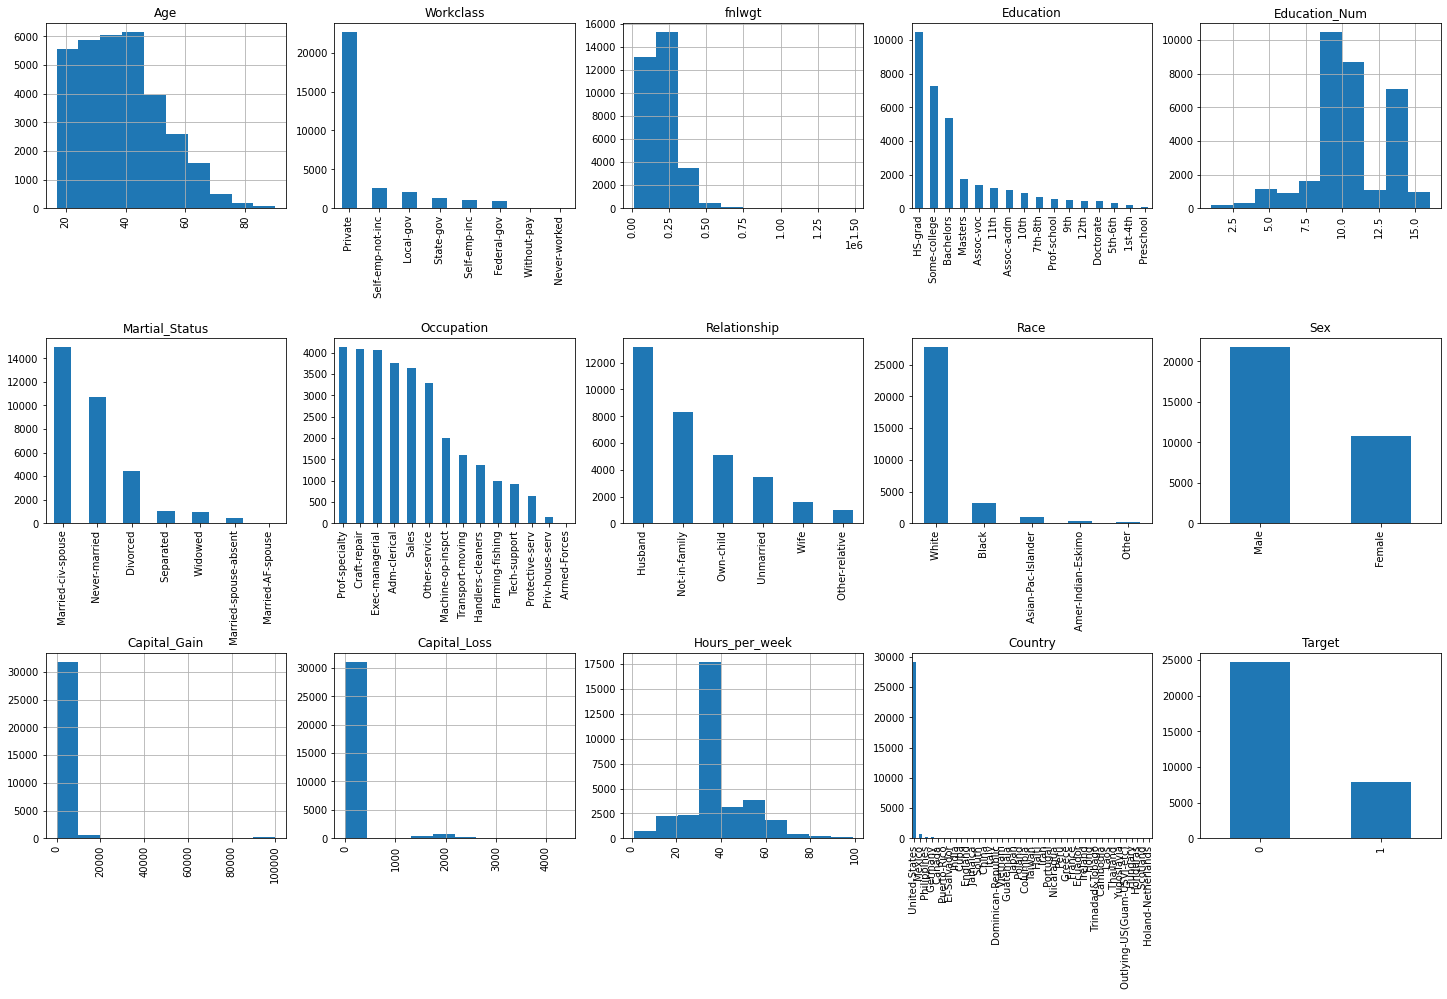

In [30]:
fig = plt.figure(figsize=(25, 15))
cols = 5
rows = int(data_train.shape[1] / cols)
for i, column in enumerate(data_train.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    if data_train.dtypes[column] == np.object:
        data_train[column].value_counts().plot(kind="bar", axes=ax)
    else:
        data_train[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2);

In [31]:
data_train.dtypes

Age                int64
Workclass         object
fnlwgt             int64
Education         object
Education_Num      int64
Martial_Status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_Gain       int64
Capital_Loss       int64
Hours_per_week     int64
Country           object
Target            object
dtype: object

In [32]:
# we see some missing values
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education_Num   32561 non-null  int64 
 5   Martial_Status  32561 non-null  object
 6   Occupation      30718 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Sex             32561 non-null  object
 10  Capital_Gain    32561 non-null  int64 
 11  Capital_Loss    32561 non-null  int64 
 12  Hours_per_week  32561 non-null  int64 
 13  Country         31978 non-null  object
 14  Target          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [33]:
# choose categorical and continuous features from data

categorical_columns = [
    c for c in data_train.columns if data_train[c].dtype.name == "object"
]
numerical_columns = [
    c for c in data_train.columns if data_train[c].dtype.name != "object"
]

print("categorical_columns:", categorical_columns)
print("numerical_columns:", numerical_columns)

categorical_columns: ['Workclass', 'Education', 'Martial_Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Country', 'Target']
numerical_columns: ['Age', 'fnlwgt', 'Education_Num', 'Capital_Gain', 'Capital_Loss', 'Hours_per_week']


In [34]:
data_train["Workclass"].fillna(data_train["Workclass"].mode()[0], inplace=True)
data_train.mode()

,Age,Workclass,fnlwgt,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
0,36.0,Private,123011,HS-grad,9.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,40.0,United-States,0
1,NaN,NaN,164190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,203488,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
for c in categorical_columns:
  data_train[c].fillna(data_train[c].mode()[0], inplace=True)
  data_test[c].fillna(data_test[c].mode()[0], inplace=True)

for c in numerical_columns:
    data_train[c].fillna(data_train[c].median(), inplace=True)
    data_test[c].fillna(data_train[c].median(), inplace=True)

In [36]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education_Num   32561 non-null  int64 
 5   Martial_Status  32561 non-null  object
 6   Occupation      32561 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Sex             32561 non-null  object
 10  Capital_Gain    32561 non-null  int64 
 11  Capital_Loss    32561 non-null  int64 
 12  Hours_per_week  32561 non-null  int64 
 13  Country         32561 non-null  object
 14  Target          32561 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.7+ MB


In [37]:
data_train.mode()

,Age,Workclass,fnlwgt,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
0,36.0,Private,123011,HS-grad,9.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,40.0,United-States,0.0
1,NaN,NaN,164190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,203488,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
data_train = pd.concat(
    [data_train[numerical_columns], pd.get_dummies(data_train[categorical_columns])],
    axis=1,
)

data_test = pd.concat(
    [data_test[numerical_columns], pd.get_dummies(data_test[categorical_columns])],
    axis=1,
)

In [39]:
set(data_train.columns) - set(data_test.columns)

{'Country_ Holand-Netherlands'}

In [40]:
data_train.shape, data_test.shape

((32561, 106), (16281, 105))

In [41]:
data_train.head(1)

,Age,fnlwgt,Education_Num,Capital_Gain,Capital_Loss,Hours_per_week,Target,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Never-worked,...,Country_ Portugal,Country_ Puerto-Rico,Country_ Scotland,Country_ South,Country_ Taiwan,Country_ Thailand,Country_ Trinadad&Tobago,Country_ United-States,Country_ Vietnam,Country_ Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [42]:
data_test["Country_ Holand-Netherlands"] = 0

In [43]:
set(data_train.columns) - set(data_test.columns)

set()

In [44]:
X_train = data_train.drop(["Target"], axis=1)
y_train = data_train["Target"]

X_test = data_test.drop(["Target"], axis=1)
y_test = data_test["Target"]

In [45]:
y_train

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: Target, Length: 32561, dtype: int64

In [46]:
tree = DecisionTreeClassifier(max_depth=3, random_state=17)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=17)

In [47]:
tree_predictions = tree.predict(X_test[X_train.columns])

In [48]:
accuracy_score(y_test, tree_predictions)

0.8447884036607088

In [49]:
%%time
tree_params = {"max_depth": range(2, 11)}

locally_best_tree = GridSearchCV(
    DecisionTreeClassifier(random_state=17), tree_params, cv=5
)

locally_best_tree.fit(X_train, y_train)

Wall time: 7.74 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=17),
             param_grid={'max_depth': range(2, 11)})

In [50]:
print("Best params:", locally_best_tree.best_params_)
print("Best cross validaton score", locally_best_tree.best_score_)

Best params: {'max_depth': 9}
Best cross validaton score 0.8565770273854106


In [51]:
tuned_tree = DecisionTreeClassifier(max_depth=9, random_state=17)
tuned_tree.fit(X_train, y_train)
tuned_tree_predictions = tuned_tree.predict(X_test)
accuracy_score(y_test, tuned_tree_predictions)

0.847798046803022

## На собственных данных

In [52]:
df = pd.read_csv("data.csv")
df.head(5) # Показываем первые 5 элементов

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [53]:
df.shape

(1599, 12)

### Подготовка данных

In [54]:
df = df.rename(columns={
    "fixed acidity": "FA",
    "volatile acidity": "VA",
    "citric acid": "CA",
    "residual sugar": "RS",
    "free sulfur dioxide": "FSD",
    "total sulfur dioxide": "total_SD"
})

In [55]:
# Так как в исходном файле не было test даты, разделим для примера на две части исходный набор
df_train = df[0:1000]
df_test = df[1000:-1]

In [56]:
df_train.shape, df_test.shape

((1000, 12), (598, 12))

In [57]:
df_train.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
FA,1000.0,8.728900,1.836602,4.60000,7.400000,8.3000,9.8000,15.9000
VA,1000.0,0.528290,0.178550,0.12000,0.400000,0.5200,0.6350,1.3300
CA,1000.0,0.294580,0.200153,0.00000,0.120000,0.2800,0.4700,1.0000
RS,1000.0,2.579400,1.238960,1.20000,2.000000,2.3000,2.7000,15.5000
chlorides,1000.0,0.090375,0.049917,0.01200,0.072000,0.0810,0.0930,0.6110
FSD,1000.0,15.171000,9.972949,1.00000,7.000000,13.0000,20.2500,68.0000
total_SD,1000.0,48.328000,33.309788,6.00000,23.000000,39.0000,64.2500,165.0000
density,1000.0,0.997349,0.001778,0.99064,0.996372,0.9973,0.9984,1.0032
pH,1000.0,3.299100,0.157948,2.74000,3.190000,3.3000,3.4000,3.9000
sulphates,1000.0,0.668520,0.183210,0.33000,0.560000,0.6200,0.7400,2.0000


In [58]:
df_test.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
FA,598.0,7.639130,1.310098,5.00000,6.80000,7.400000,8.20000,12.60000
VA,598.0,0.527400,0.179986,0.16000,0.39000,0.520000,0.64000,1.58000
CA,598.0,0.231171,0.178749,0.00000,0.07000,0.220000,0.36000,0.78000
RS,598.0,2.469147,1.656164,0.90000,1.80000,2.100000,2.40000,15.40000
chlorides,598.0,0.082637,0.041492,0.03800,0.06600,0.076000,0.08600,0.41500
FSD,598.0,17.048495,11.145534,3.00000,8.00000,15.000000,24.00000,72.00000
total_SD,598.0,43.364548,32.005235,7.00000,20.00000,35.000000,59.00000,289.00000
density,598.0,0.995741,0.001619,0.99007,0.99488,0.995775,0.99668,1.00369
pH,598.0,3.331070,0.146296,2.88000,3.24000,3.330000,3.41000,4.01000
sulphates,598.0,0.640803,0.142336,0.37000,0.54000,0.610000,0.72000,1.34000


In [59]:
df_train.quality.value_counts()

5    468
6    364
7    121
4     32
8     10
3      5
Name: quality, dtype: int64

In [60]:
df_train.shape

(1000, 12)

### Визуализация данных

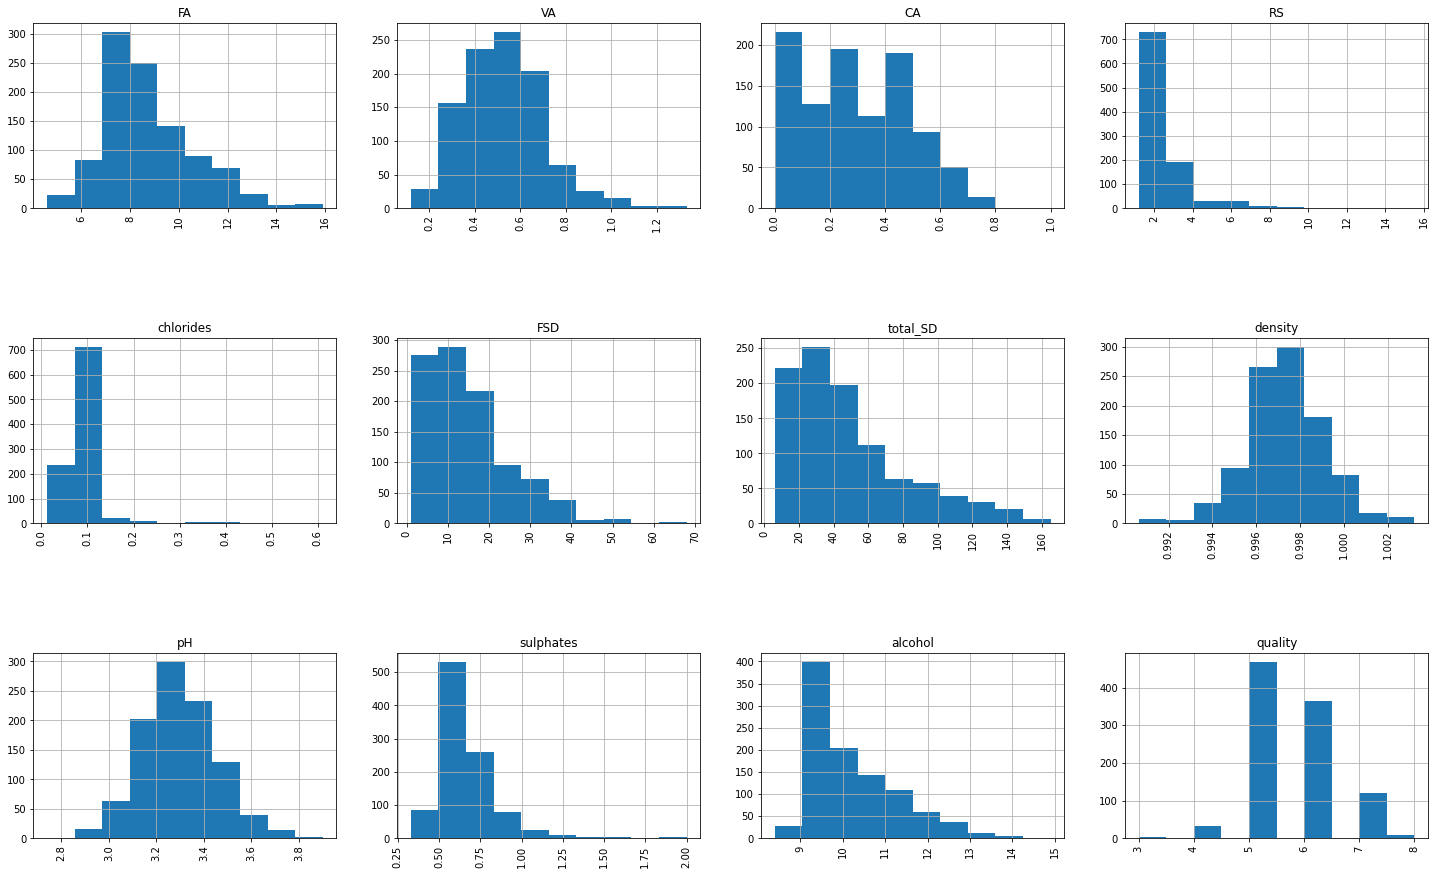

In [61]:
fig = plt.figure(figsize=(25, 15))
cols = 4
rows = int(df_train.shape[1] / cols)
for i, column in enumerate(df_train.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    if df_train.dtypes[column] == np.object:
        df_train[column].value_counts().plot(kind="bar", axes=ax)
    else:
        df_train[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2);

### Удаление дупликатов

In [62]:
duplicate_rows_df = df_train[df_train.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (149, 12)


In [63]:
df_train = df_train.drop_duplicates()

In [64]:
df_train.count()

FA           851
VA           851
CA           851
RS           851
chlorides    851
FSD          851
total_SD     851
density      851
pH           851
sulphates    851
alcohol      851
quality      851
dtype: int64

### Проверка на нулевые объекты

In [65]:
print(df.isnull().sum()) 

FA           0
VA           0
CA           0
RS           0
chlorides    0
FSD          0
total_SD     0
density      0
pH           0
sulphates    0
alcohol      0
quality      0
dtype: int64


In [66]:
df_train.dtypes

FA           float64
VA           float64
CA           float64
RS           float64
chlorides    float64
FSD          float64
total_SD     float64
density      float64
pH           float64
sulphates    float64
alcohol      float64
quality        int64
dtype: object

### Преобразование типов данных к Int

In [67]:
df_train["FA"] = df_train["FA"].astype(int)
df_train["VA"] = df_train["VA"].astype(int)
df_train["CA"] = df_train["CA"].astype(int)
df_train["RS"] = df_train["RS"].astype(int)
df_train["chlorides"] = df_train["chlorides"].astype(int)
df_train["FSD"] = df_train["FSD"].astype(int)
df_train["total_SD"] = df_train["total_SD"].astype(int)
df_train["density"] = df_train["chlorides"].astype(int)
df_train["pH"] = df_train["FSD"].astype(int)
df_train["sulphates"] = df_train["total_SD"].astype(int)
df_train["alcohol"] = df_train["alcohol"].astype(int)

In [68]:
df_train.dtypes

FA           int32
VA           int32
CA           int32
RS           int32
chlorides    int32
FSD          int32
total_SD     int32
density      int32
pH           int32
sulphates    int32
alcohol      int32
quality      int64
dtype: object

In [69]:
df_train

,FA,VA,CA,RS,chlorides,FSD,total_SD,density,pH,sulphates,alcohol,quality
0,7,0,0,1,0,11,34,0,11,34,9,5
1,7,0,0,2,0,25,67,0,25,67,9,5
2,7,0,0,2,0,15,54,0,15,54,9,5
3,11,0,0,1,0,17,60,0,17,60,9,6
5,7,0,0,1,0,13,40,0,13,40,9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
994,10,0,0,2,0,20,88,0,20,88,9,5
995,7,0,0,2,0,19,41,0,19,41,10,6
996,5,0,0,2,0,3,11,0,3,11,12,7
998,8,0,0,1,0,4,10,0,4,10,9,6


### Проверка схожести фреймов данных тестовой и тренивовочной выборки

In [70]:
set(df_train.columns) - set(df_test.columns)

set()

### Дерево решений без параметров

In [71]:
X_train = df_train.drop(["quality"], axis=1)
y_train = df_train["quality"]

X_test = df_test.drop(["quality"], axis=1)
y_test = df_test["quality"]

In [72]:
tree = DecisionTreeClassifier(max_depth=3, random_state=17)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=17)

In [73]:
tree_predictions = tree.predict(X_test[X_train.columns])

In [74]:
accuracy_score(y_test, tree_predictions)

0.46321070234113715